In [2]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import scipy.special as spsp
import scipy.misc as spm
import scipy.optimize as spo
import numpy.linalg as npl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline
import sympy as sym
import time
import seaborn as sns
import seaborn.distributions as snsd
import math as math
from label_lines import *

In [6]:
# Generate data
npr.seed(1)
N = 100000
dataType = "Gaussian"
#dataType = "logNormal"
x = npr.randn(N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print "Mean of x =", realMean
print "Std of x =", realStd

Mean of x = 0.00525302848968
Std of x = 0.998329273542


In [4]:
#Several individuals
npr.seed(1)
N = 100000
dataType = "Gaussian"
#dataType = "logNormal"
X=[]
for i in range(10):
    X.append(npr.randn(N))
    

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
means=[]
stds=[]
for i in range(10):
    means.append(np.mean(X[i]))
    stds.append(np.std(X[i]))

In [5]:
Gradient = lambda x_float, mu_float, sigma_float:np.array([-(2*mu_float - 2*x_float)/(2*sigma_float**2), -1/sigma_float + (-mu_float + x_float)**2/sigma_float**3]).T
Hessian = lambda x_float, mu_float, sigma_float:[[-1/sigma_float**2*np.ones(x_float.shape), 2*(mu_float - x_float)/sigma_float**3], [2*(mu_float - x_float)/sigma_float**3, (1 - 3*(mu_float - x_float)**2/sigma_float**2)/sigma_float**2]]

In [7]:
def langevin(T,mean):
    theta = np.array([mean, np.log(realStd)])
    S = np.zeros((T,2))
    M = N/10. # Size of the subsample
    acceptance = 0.0
    for i in range(T):
        stepsize = .1/N/((i+1)**.33)
        inds = npr.randint(0,N,size=M)
        gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
        theta[0] = theta[0] + stepsize*gradEstimate[0] + np.sqrt(stepsize)*npr.randn()
        theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
        S[i,:] = theta
        if np.mod(i,T/10)==0:
            print "Iteration", i
            
    return S

In [14]:
def langevin_nesterov(T,mean,sigma):
    theta = np.array([mean, np.log(realStd)])
    S = np.zeros((T,2))
    M = N/10. # Size of the subsample
    L1=[theta[0]]
    L2=[theta[1]]
    acceptance = 0.0
    for i in range(T):
        if i == 0:
            stepsize = .1/N/((i+1)**.33)
            inds = npr.randint(0,N,size=M)
            gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
            theta[0] = theta[0] + stepsize*gradEstimate[0] + np.sqrt(stepsize)*npr.randn()
            theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
            L1.append(theta[0])
            L2.append(theta[1])
            S[i,:] = theta
        else:
            stepsize = .1/N/((i+1)**.33)
            inds = npr.randint(0,N,size=M)
            gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
            theta[0] = theta[0] + stepsize*gradEstimate[0] + sigma*(theta[0] - L1[i-1]) + np.sqrt(stepsize)*npr.randn()
            theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + sigma*(theta[1] - L2[i-1]) + np.sqrt(stepsize)*npr.randn())
            L1.append(theta[0])
            L2.append(theta[1])
            S[i,:] = theta
            if np.mod(i,T/10)==0:
                print "Iteration", i
            
    return S

In [7]:
def langevin_hessian(T,mean):
    return S

In [9]:
def langevin_block(T,mean):
    theta = np.column_stack((mean,np.log(stds)))
    S = np.zeros((T,2))
    M = N # Size of the subsample
    for i in range(T):
        stepsize = .1/N/((i+1)**.33)
        inds = npr.randint(0,N,size=M)
        gradEstimate[j] = N/M*np.sum(Gradient(X[j][inds], theta[j][0], np.exp(theta[j][1])), 0)
        theta[j][0] = theta[j][0] + stepsize*gradEstimate[j][0] + np.sqrt(stepsize)*npr.randn()
        theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
        S[i,:] = theta
        if np.mod(i,T/10)==0:
            print "Iteration", i 
            
    return S

#ULA vs ULA nesterov

#sigma = 0.5

In [11]:
niters = 1000
sigma = 0.5
samples_ula = [langevin(niters, mean) for mean in np.arange(0.1, 4, 1)]
samples_nest = [langevin_nesterov(niters, mean, sigma) for mean in np.arange(0.1, 4, 1)]

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500


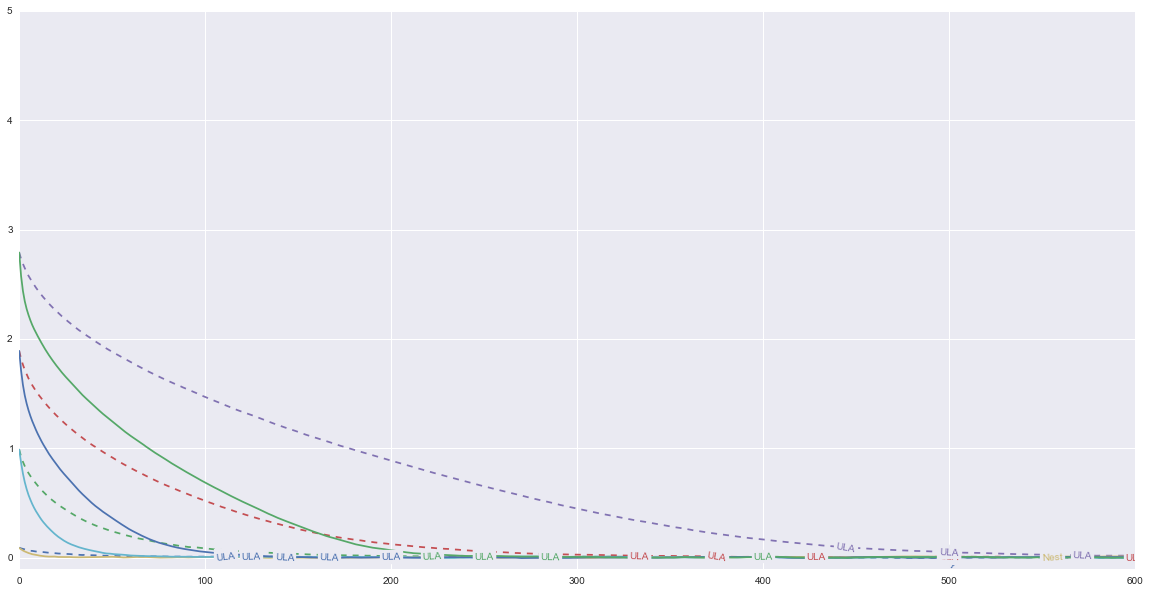

In [23]:
#several chain
plt.figure(figsize=(20,10))
for samples in samples_ula:
    plt.plot(samples[:,0], '--',label=str('ULA'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
for samples in samples_nest:
    plt.plot(samples[:,0], '-',label=str('Nest'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, 600])
plt.ylim([-0.1, 5]);

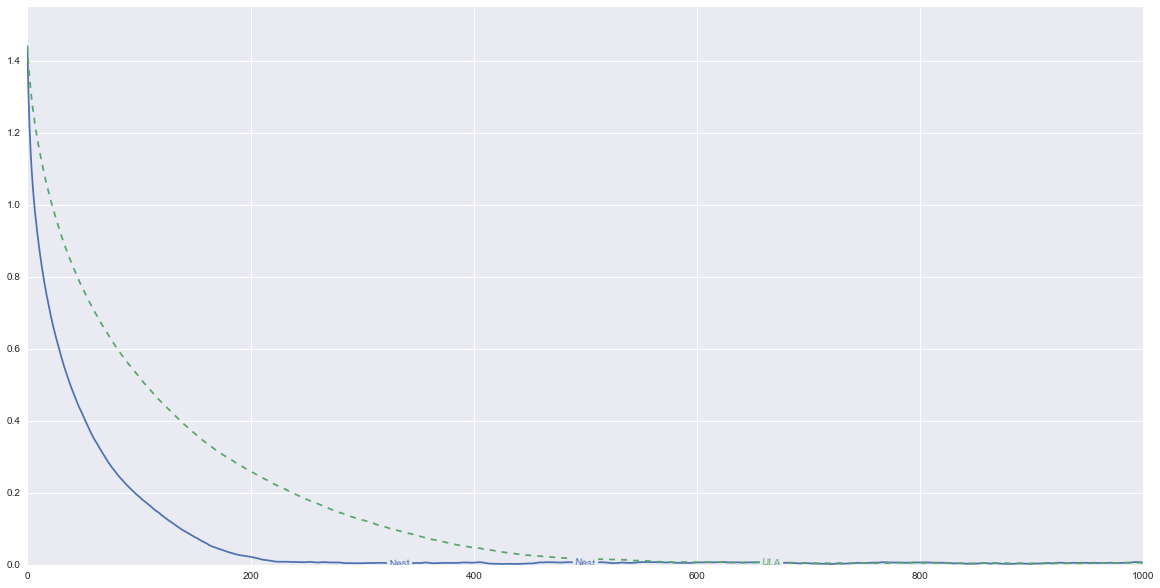

In [13]:
#averaged
nest = sum(samples_nest)/len(np.arange(0.1, 4, 1))
ula = sum(samples_ula)/len(np.arange(0.1, 4, 1))
plt.figure(figsize=(20,10))
plt.plot(nest[:,0], '-',label=str('Nest'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.plot(ula[:,0], '--',label=str('ULA'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, niters])
plt.ylim([-0, 1.55]);

#sigma = 0.1

In [60]:
niters = 1000
sigma = 0.1
samples_ula = [langevin(niters, mean) for mean in np.arange(0.1, 4, 1)]
samples_nest = [langevin_nesterov(niters, mean, sigma) for mean in np.arange(0.1, 4, 1)]

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900


In [48]:
niters = 10000
samples_ula = [langevin(niters, mean) for mean in np.arange(0.1, 4, 1)]
samples_nest = [langevin_nesterov(niters, mean) for mean in np.arange(0.1, 4, 1)]

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iterati

x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!
x label location is outside data range!


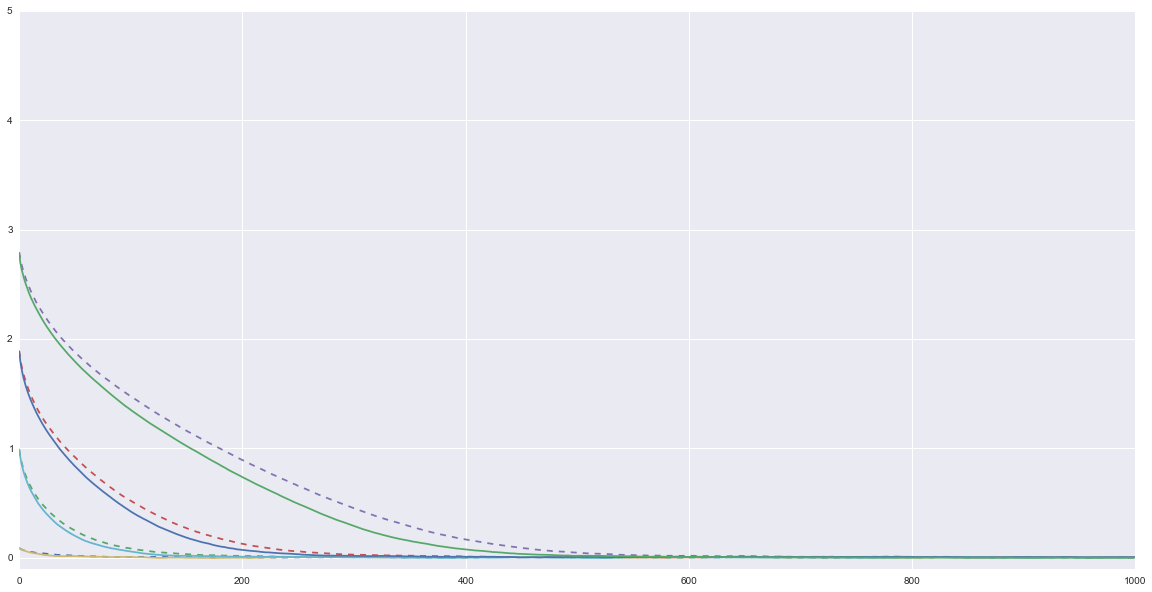

In [66]:
#several chain
plt.figure(figsize=(20,10))
for samples in samples_ula:
    plt.plot(samples[:,0], '--',label=str('ULA'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
for samples in samples_nest:
    plt.plot(samples[:,0], '-',label=str('Nest'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, niters])
plt.ylim([-0.1, 5]);

x label location is outside data range!


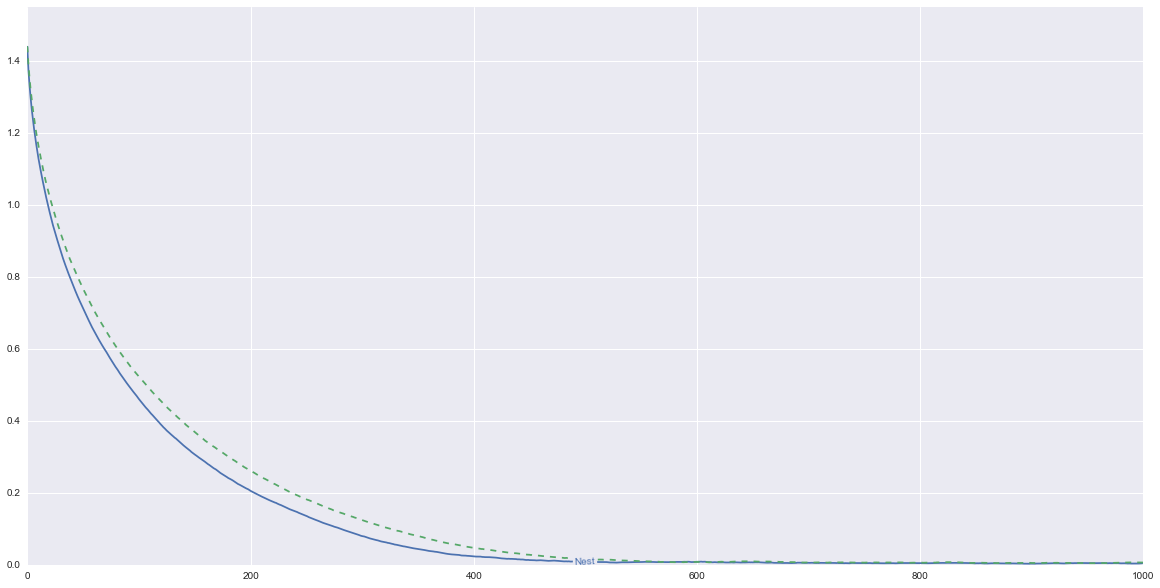

In [68]:
#averaged
nest = sum(samples_nest)/len(np.arange(0.1, 4, 1))
ula = sum(samples_ula)/len(np.arange(0.1, 4, 1))
plt.figure(figsize=(20,10))
plt.plot(nest[:,0], '-',label=str('Nest'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.plot(ula[:,0], '--',label=str('ULA'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, 1000])
plt.ylim([-0, 1.55]);

#ULA vs ULA by block

In [95]:
def langevinreg(T,mean):
    theta = np.array([mean, np.log(realStd)])
    S = np.zeros((T,2))
    M = N # Size of the subsample
    acceptance = 0.0
    for i in range(T):
        stepsize = .1/N/((i+1)**.33)
        inds = npr.randint(0,N,size=M)
        gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
        theta[0] = theta[0] + stepsize*gradEstimate[0] + np.sqrt(stepsize)*npr.randn()
        theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
        S[i,:] = theta
        if np.mod(i,T/10)==0:
            print "Iteration", i
            
    return S

In [101]:
def langevinblo(T,mean):
    theta = np.array([mean, np.log(realStd)])
    S = np.zeros((T,2))
    M = N/100. # Size of the subsample
    acceptance = 0.0
    for i in range(T):
        stepsize = .1/N/((i+1)**.33)
        inds = npr.randint(0,N,size=M)
        gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
        theta[0] = theta[0] + stepsize*gradEstimate[0] + np.sqrt(stepsize)*npr.randn()
        theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
        S[i,:] = theta
        if np.mod(i,T/10)==0:
            print "Iteration", i
            
    return S

In [102]:
samples_block = [langevinblo(niters, mean) for mean in np.arange(0.1, 4, 1)]

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900


In [97]:
niters = 1000
samples_ula = [langevinreg(niters, mean) for mean in np.arange(0.1, 4, 1)]
samples_block = [langevinblo(niters, mean) for mean in np.arange(0.1, 4, 1)]

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 0
Iteration 100
Iteratio

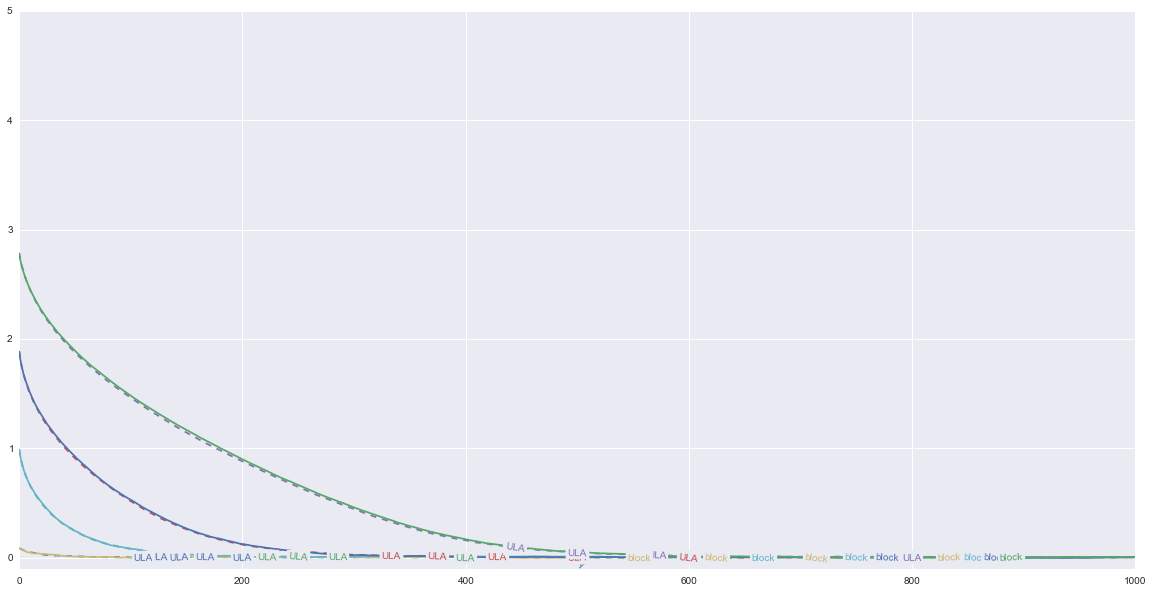

In [103]:
#several chain
plt.figure(figsize=(20,10))
for samples in samples_ula:
    plt.plot(samples[:,0], '--',label=str('ULA'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
for samples in samples_block:
    plt.plot(samples[:,0], '-',label=str('block'))
    labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, niters])
plt.ylim([-0.1, 5]);

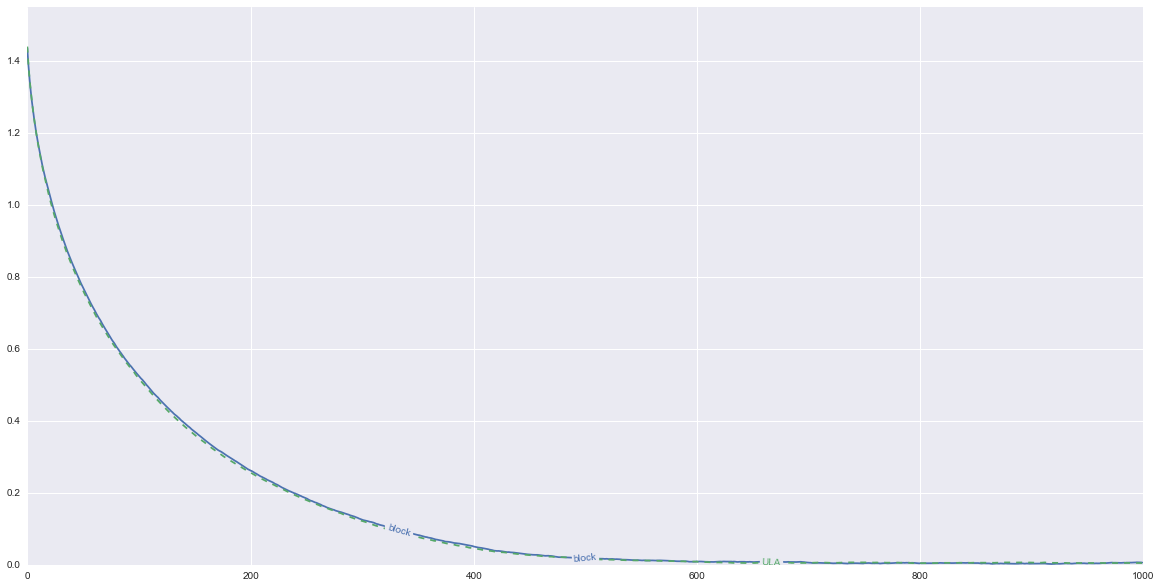

In [104]:
#averaged
block = sum(samples_block)/len(np.arange(0.1, 4, 1))
ula = sum(samples_ula)/len(np.arange(0.1, 4, 1))
plt.figure(figsize=(20,10))
plt.plot(block[:,0], '-',label=str('block'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.plot(ula[:,0], '--',label=str('ULA'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, 1000])
plt.ylim([-0, 1.55]);